# NSMC 데이터셋 불러오기
- [Naver Sentiment Movie Corpus](https://github.com/e9t/nsmc)
    - 한국어로 작성된 네이버 영화 리뷰 데이터셋
- 데이터 구성
    - size
        - train: 150,000
        - test: 50,000
    - columns
        - id
            - 네이버에서 붙인 리뷰 id
        - document
            - string, 리뷰 텍스트
        - label
            - int, 리뷰에 대한 감정 라벨
            - 긍정적: 1, 부정적: 0

In [1]:
from datasets import load_dataset

dataset = load_dataset('nsmc')

Using custom data configuration default
Reusing dataset nsmc (/aiffel/.cache/huggingface/datasets/nsmc/default/1.1.0/bfd4729bf1a67114e5267e6916b9e4807010aeb238e4a3c2b95fbfa3a014b5f3)


  0%|          | 0/2 [00:00<?, ?it/s]

In [2]:
# 데이터 수 확인
dataset

DatasetDict({
    train: Dataset({
        features: ['id', 'document', 'label'],
        num_rows: 150000
    })
    test: Dataset({
        features: ['id', 'document', 'label'],
        num_rows: 50000
    })
})

In [3]:
# 학습/테스트 데이터셋 분리
train_dataset = dataset['train']
test_dataset = dataset['test']

In [4]:
# 위의 5개 데이터 확인하기
for i in range(5):
    for col in train_dataset.column_names:
        print(col, ":", train_dataset[col][i])
    print()

id : 9976970
document : 아 더빙.. 진짜 짜증나네요 목소리
label : 0

id : 3819312
document : 흠...포스터보고 초딩영화줄....오버연기조차 가볍지 않구나
label : 1

id : 10265843
document : 너무재밓었다그래서보는것을추천한다
label : 0

id : 9045019
document : 교도소 이야기구먼 ..솔직히 재미는 없다..평점 조정
label : 0

id : 6483659
document : 사이몬페그의 익살스런 연기가 돋보였던 영화!스파이더맨에서 늙어보이기만 했던 커스틴 던스트가 너무나도 이뻐보였다
label : 1



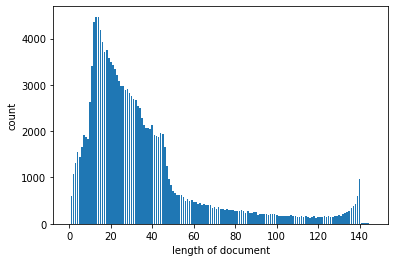

In [5]:
# 리뷰 문장의 길이 분포 그래프 그리기
import numpy as np
import matplotlib.pyplot as plt


train_lengths = np.array(list(map(len, train_dataset['document'])))

lengths, counts = np.unique(train_lengths, return_counts=True)
plt.bar(x=lengths, height=counts)
plt.xlabel('length of document')
plt.ylabel('count')
plt.show()

# 모델, 토크나이저 불러오기
- [klue/bert-base](https://huggingface.co/klue/bert-base)
    - KLUE 데이터셋을 pre-train한 BERT 모델

In [6]:
# model과 tokenizer 불러오기
from transformers import AutoTokenizer, AutoModelForSequenceClassification

model = AutoModelForSequenceClassification.from_pretrained("klue/bert-base")
tokenizer = AutoTokenizer.from_pretrained("klue/bert-base")

Some weights of the model checkpoint at klue/bert-base were not used when initializing BertForSequenceClassification: ['cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.dense.bias', 'cls.predictions.bias', 'cls.seq_relationship.bias', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.decoder.bias', 'cls.predictions.transform.dense.weight', 'cls.predictions.decoder.weight', 'cls.seq_relationship.weight']
- This IS expected if you are initializing BertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of BertForSequenceClassification were not initialized

In [7]:
# 불러온 model과 tokenizer 확인하기
print('model:', model.__class__)
print('tokenizer:', tokenizer.__class__)

model: <class 'transformers.models.bert.modeling_bert.BertForSequenceClassification'>
tokenizer: <class 'transformers.models.bert.tokenization_bert_fast.BertTokenizerFast'>


# 데이터 전처리
- tokenizer로 추가되는 columns
    - input_ids
        - List(int), 정수로 표현된 토큰 리스트
    - attention_mask
        - List(int), 어텐션을 진행할 토큰 마스크
        - 문장 토큰과 패딩 토큰을 구분

In [8]:
# 데이터를 토큰화하는 함수
def transform(data):
    return tokenizer(
        data['document'],
        truncation=True,
        padding='max_length',
        return_token_type_ids=False,
    )

In [9]:
# transform 데이터 테스트
for i in range(5):
    tokens = transform(train_dataset[i])
    print(tokens)

{'input_ids': [2, 1376, 831, 2604, 18, 18, 4229, 9801, 2075, 2203, 2182, 4243, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 

In [10]:
# 데이터셋 토큰화
train_dataset = train_dataset.map(transform, batched=True)
test_dataset = test_dataset.map(transform, batched=True)

  0%|          | 0/150 [00:00<?, ?ba/s]

  0%|          | 0/50 [00:00<?, ?ba/s]

In [11]:
# 전처리된 데이터셋 확인
train_dataset

Dataset({
    features: ['attention_mask', 'document', 'id', 'input_ids', 'label'],
    num_rows: 150000
})

# 모델 학습

## Dynamic Padding 없음

In [12]:
import os
import numpy as np
from transformers import Trainer, TrainingArguments

# 가중치를 저장할 위치
output_dir = os.getenv('HOME') + '/aiffel/transformers'

training_arguments = TrainingArguments(
    output_dir,
    evaluation_strategy='epoch',
    learning_rate=2e-5,
    per_device_train_batch_size=4, # 메모리 부족으로 인해 batch_size 고정
    per_device_eval_batch_size=4,
    num_train_epochs=1,
    weight_decay=0.01,
)

In [13]:
training_arguments

TrainingArguments(
_n_gpu=1,
adafactor=False,
adam_beta1=0.9,
adam_beta2=0.999,
adam_epsilon=1e-08,
dataloader_drop_last=False,
dataloader_num_workers=0,
dataloader_pin_memory=True,
ddp_find_unused_parameters=None,
debug=[],
deepspeed=None,
disable_tqdm=False,
do_eval=True,
do_predict=False,
do_train=False,
eval_accumulation_steps=None,
eval_steps=None,
evaluation_strategy=IntervalStrategy.EPOCH,
fp16=False,
fp16_backend=auto,
fp16_full_eval=False,
fp16_opt_level=O1,
gradient_accumulation_steps=1,
gradient_checkpointing=False,
greater_is_better=None,
group_by_length=False,
hub_model_id=None,
hub_strategy=HubStrategy.EVERY_SAVE,
hub_token=<HUB_TOKEN>,
ignore_data_skip=False,
label_names=None,
label_smoothing_factor=0.0,
learning_rate=2e-05,
length_column_name=length,
load_best_model_at_end=False,
local_rank=-1,
log_level=-1,
log_level_replica=-1,
log_on_each_node=True,
logging_dir=/aiffel/aiffel/transformers/runs/Sep15_08-33-21_wy73nz14myc73iartlx33j2ur-54bdb8549d-sgkzf,
logging_first_s

In [14]:
import datasets

metric = datasets.load_metric('accuracy')

# metric 함수
def compute_metrics(eval_pred):
    predictions, labels = eval_pred
    predictions = np.argmax(predictions, axis=1)
    return metric.compute(predictions=predictions, references=labels)

In [24]:
# fine-tuning을 위한 trainer
trainer = Trainer(
    model=model,
    args=training_arguments,
    train_dataset=train_dataset,
    eval_dataset=test_dataset,
    compute_metrics=compute_metrics
)

In [25]:
# 모델 fine-tuning
trainer.train()

The following columns in the training set  don't have a corresponding argument in `BertForSequenceClassification.forward` and have been ignored: id, document.
***** Running training *****
  Num examples = 150000
  Num Epochs = 1
  Instantaneous batch size per device = 4
  Total train batch size (w. parallel, distributed & accumulation) = 4
  Gradient Accumulation steps = 1
  Total optimization steps = 37500


Epoch,Training Loss,Validation Loss,Accuracy
1,0.395100,0.389570,0.901040


Saving model checkpoint to /aiffel/aiffel/transformers/checkpoint-500
Configuration saved in /aiffel/aiffel/transformers/checkpoint-500/config.json
Model weights saved in /aiffel/aiffel/transformers/checkpoint-500/pytorch_model.bin
Saving model checkpoint to /aiffel/aiffel/transformers/checkpoint-1000
Configuration saved in /aiffel/aiffel/transformers/checkpoint-1000/config.json
Model weights saved in /aiffel/aiffel/transformers/checkpoint-1000/pytorch_model.bin
Saving model checkpoint to /aiffel/aiffel/transformers/checkpoint-1500
Configuration saved in /aiffel/aiffel/transformers/checkpoint-1500/config.json
Model weights saved in /aiffel/aiffel/transformers/checkpoint-1500/pytorch_model.bin
Saving model checkpoint to /aiffel/aiffel/transformers/checkpoint-2000
Configuration saved in /aiffel/aiffel/transformers/checkpoint-2000/config.json
Model weights saved in /aiffel/aiffel/transformers/checkpoint-2000/pytorch_model.bin
Saving model checkpoint to /aiffel/aiffel/transformers/checkpoi

Saving model checkpoint to /aiffel/aiffel/transformers/checkpoint-18500
Configuration saved in /aiffel/aiffel/transformers/checkpoint-18500/config.json
Model weights saved in /aiffel/aiffel/transformers/checkpoint-18500/pytorch_model.bin
Saving model checkpoint to /aiffel/aiffel/transformers/checkpoint-19000
Configuration saved in /aiffel/aiffel/transformers/checkpoint-19000/config.json
Model weights saved in /aiffel/aiffel/transformers/checkpoint-19000/pytorch_model.bin
Saving model checkpoint to /aiffel/aiffel/transformers/checkpoint-19500
Configuration saved in /aiffel/aiffel/transformers/checkpoint-19500/config.json
Model weights saved in /aiffel/aiffel/transformers/checkpoint-19500/pytorch_model.bin
Saving model checkpoint to /aiffel/aiffel/transformers/checkpoint-20000
Configuration saved in /aiffel/aiffel/transformers/checkpoint-20000/config.json
Model weights saved in /aiffel/aiffel/transformers/checkpoint-20000/pytorch_model.bin
Saving model checkpoint to /aiffel/aiffel/transf

Configuration saved in /aiffel/aiffel/transformers/checkpoint-37000/config.json
Model weights saved in /aiffel/aiffel/transformers/checkpoint-37000/pytorch_model.bin
Saving model checkpoint to /aiffel/aiffel/transformers/checkpoint-37500
Configuration saved in /aiffel/aiffel/transformers/checkpoint-37500/config.json
Model weights saved in /aiffel/aiffel/transformers/checkpoint-37500/pytorch_model.bin
The following columns in the evaluation set  don't have a corresponding argument in `BertForSequenceClassification.forward` and have been ignored: id, document.
***** Running Evaluation *****
  Num examples = 50000
  Batch size = 4


Training completed. Do not forget to share your model on huggingface.co/models =)




TrainOutput(global_step=37500, training_loss=0.4177820764160156, metrics={'train_runtime': 17041.4261, 'train_samples_per_second': 8.802, 'train_steps_per_second': 2.201, 'total_flos': 3.9466658304e+16, 'train_loss': 0.4177820764160156, 'epoch': 1.0})

## Dynamic Padding 추가
- [Dynamic Padding](https://www.youtube.com/watch?v=7q5NyFT8REg)
    - 배치별로 패딩 길이를 달리한다
        - 배치내 가장 긴 길이를 기준으로 패딩 추가
        - 패딩으로 낭비되는 메모리를 줄일 수 있다
- DataCollator
    - 데이터를 배치로 묶는 객체
    - 모델 종류에 따라 다양한 옵션을 제공한다
        - DataCollatorForLanguageModeling
            - MLM task로 변환 가능
        - DataCollatorWithPadding
            - 원하는 방식의 Padding 방식(Padding Strategy) 지정 가능

In [15]:
# 전처리시 패딩 미적용
def transform_without_padding(data):
    return tokenizer(
        data['document'],
        truncation=True,
        return_token_type_ids=False,
    )

# 패딩 없는 데이터셋 생성
train_dataset = dataset['train']
test_dataset = dataset['test']

train_dataset = train_dataset.map(transform_without_padding, batched=True)
test_dataset = test_dataset.map(transform_without_padding, batched=True)

  0%|          | 0/150 [00:00<?, ?ba/s]

  0%|          | 0/50 [00:00<?, ?ba/s]

In [16]:
from transformers import DataCollatorWithPadding

# data collator
data_collator = DataCollatorWithPadding(tokenizer=tokenizer, pad_to_multiple_of=4)

In [17]:
# 기존 모델 삭제
del model

# pre-trained 모델 새로 불러오기
model = AutoModelForSequenceClassification.from_pretrained("klue/bert-base")

Some weights of the model checkpoint at klue/bert-base were not used when initializing BertForSequenceClassification: ['cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.dense.bias', 'cls.predictions.bias', 'cls.seq_relationship.bias', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.decoder.bias', 'cls.predictions.transform.dense.weight', 'cls.predictions.decoder.weight', 'cls.seq_relationship.weight']
- This IS expected if you are initializing BertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of BertForSequenceClassification were not initialized

In [18]:
training_arguments = TrainingArguments(
    output_dir,
    evaluation_strategy='epoch',
    learning_rate=2e-5,
    #per_device_train_batch_size=4, # Dynamic Padding으로 더 큰 batch로 돌릴 수 있도록
    #per_device_eval_batch_size=4,  # 직접 지정한 batch_size를 해제
    num_train_epochs=1,
    weight_decay=0.01,
    group_by_length=True # 길이가 비슷한 데이터끼리 묶기
)

trainer = Trainer(
    model=model,
    args=training_arguments,
    train_dataset=train_dataset,
    eval_dataset=test_dataset,
    compute_metrics=compute_metrics,
    data_collator=data_collator # data_collator 추가
)

In [19]:
trainer.train()

The following columns in the training set  don't have a corresponding argument in `BertForSequenceClassification.forward` and have been ignored: document, id.
***** Running training *****
  Num examples = 150000
  Num Epochs = 1
  Instantaneous batch size per device = 8
  Total train batch size (w. parallel, distributed & accumulation) = 8
  Gradient Accumulation steps = 1
  Total optimization steps = 18750


Epoch,Training Loss,Validation Loss,Accuracy
1,0.258700,0.281505,0.902960


Saving model checkpoint to /aiffel/aiffel/transformers/checkpoint-500
Configuration saved in /aiffel/aiffel/transformers/checkpoint-500/config.json
Model weights saved in /aiffel/aiffel/transformers/checkpoint-500/pytorch_model.bin
Saving model checkpoint to /aiffel/aiffel/transformers/checkpoint-1000
Configuration saved in /aiffel/aiffel/transformers/checkpoint-1000/config.json
Model weights saved in /aiffel/aiffel/transformers/checkpoint-1000/pytorch_model.bin
Saving model checkpoint to /aiffel/aiffel/transformers/checkpoint-1500
Configuration saved in /aiffel/aiffel/transformers/checkpoint-1500/config.json
Model weights saved in /aiffel/aiffel/transformers/checkpoint-1500/pytorch_model.bin
Saving model checkpoint to /aiffel/aiffel/transformers/checkpoint-2000
Configuration saved in /aiffel/aiffel/transformers/checkpoint-2000/config.json
Model weights saved in /aiffel/aiffel/transformers/checkpoint-2000/pytorch_model.bin
Saving model checkpoint to /aiffel/aiffel/transformers/checkpoi

Saving model checkpoint to /aiffel/aiffel/transformers/checkpoint-18000
Configuration saved in /aiffel/aiffel/transformers/checkpoint-18000/config.json
Model weights saved in /aiffel/aiffel/transformers/checkpoint-18000/pytorch_model.bin
Saving model checkpoint to /aiffel/aiffel/transformers/checkpoint-18500
Configuration saved in /aiffel/aiffel/transformers/checkpoint-18500/config.json
Model weights saved in /aiffel/aiffel/transformers/checkpoint-18500/pytorch_model.bin
The following columns in the evaluation set  don't have a corresponding argument in `BertForSequenceClassification.forward` and have been ignored: document, id.
***** Running Evaluation *****
  Num examples = 50000
  Batch size = 8


Training completed. Do not forget to share your model on huggingface.co/models =)




TrainOutput(global_step=18750, training_loss=0.31370203816731773, metrics={'train_runtime': 2384.7069, 'train_samples_per_second': 62.901, 'train_steps_per_second': 7.863, 'total_flos': 1902112041402240.0, 'train_loss': 0.31370203816731773, 'epoch': 1.0})

# 학습 결과 비교
||Dynamic Padding 없음|Dynamic Padding 적용|
|-|-|-|
|학습 소요 시간|4:44:00|0:39:44|
|Training Loss|0.395100|0.258700|
|Test Loss|0.389570|0.281505|
|Test Accuracy|0.901040|0.902960|

- Dynamic Padding을 적용함으로써 batch_size를 4에서 8로 올릴 수 있었음
- batch_size가 커짐에 따라 소요 시간이 현저히 줄어들었고 정확도가 0.1920%p 상승

# 회고
- fine-tuning 또한 매우 오래 걸리는 작업
- 학습을 돌릴때 메모리 관리가 가장 중요
    - VRAM 부족으로 미니배치 크기를 늘릴 수 없었음
    - Dynamic Padding으로 그나마 줄여서 미니배치 크기를 조금이나마 늘릴수 있었음
    - 전반적으로 메모리 관리가 모델 학습 시간이나 성능에도 영향을 끼친다는 것을 알게됨